In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')

1. Rozdziel zestaw danych na podzbiory uczący i testowy.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [1,2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

2. Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty.

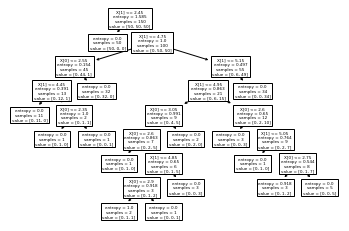

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


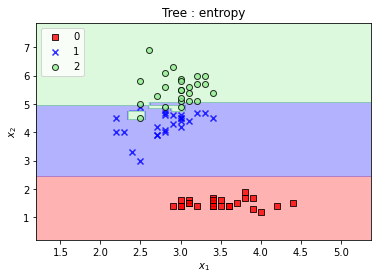

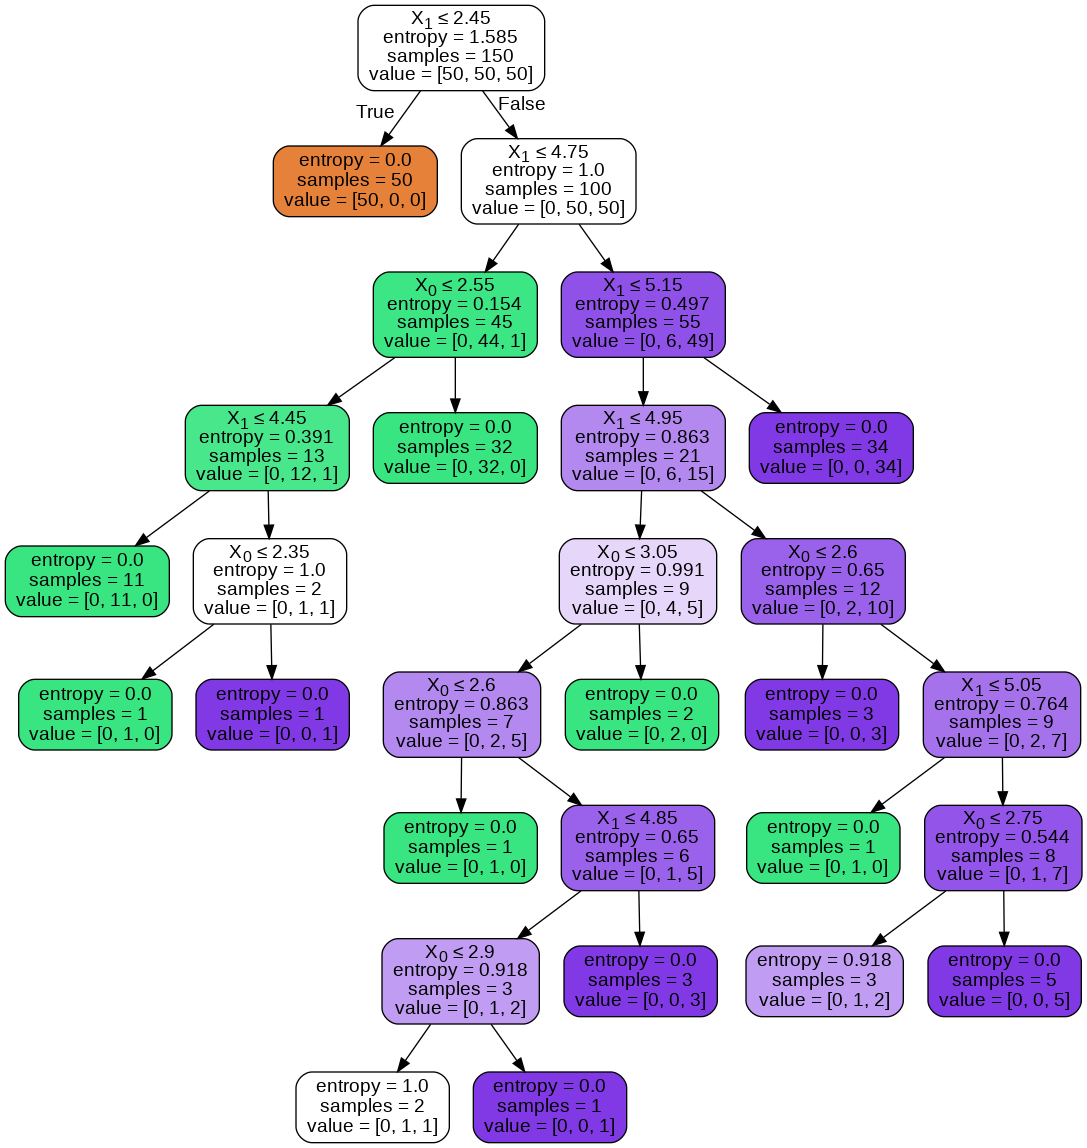

In [ ]:
# Drzewo z entropią
tree_entropy = tree.DecisionTreeClassifier(criterion = 'entropy') # Uzupełnić parametry konstruktora
tree_entropy = tree_entropy.fit(X, y)
tree.plot_tree(tree_entropy) 
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=tree_entropy)
plt.title('Tree : entropy')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

# zapis graficzny drzewa i otwarcie go
dot_data = StringIO()
export_graphviz(tree_entropy, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_e.png')
Image(graph.create_png())

# Poziom nieuporządkowania ułatwia ustalenie, jaki wpływ ma dany atrybut na atrybut decyzyjny

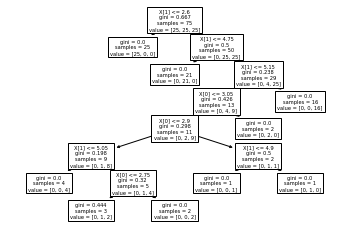

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


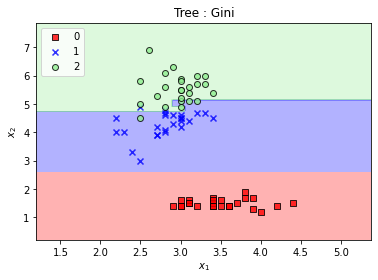

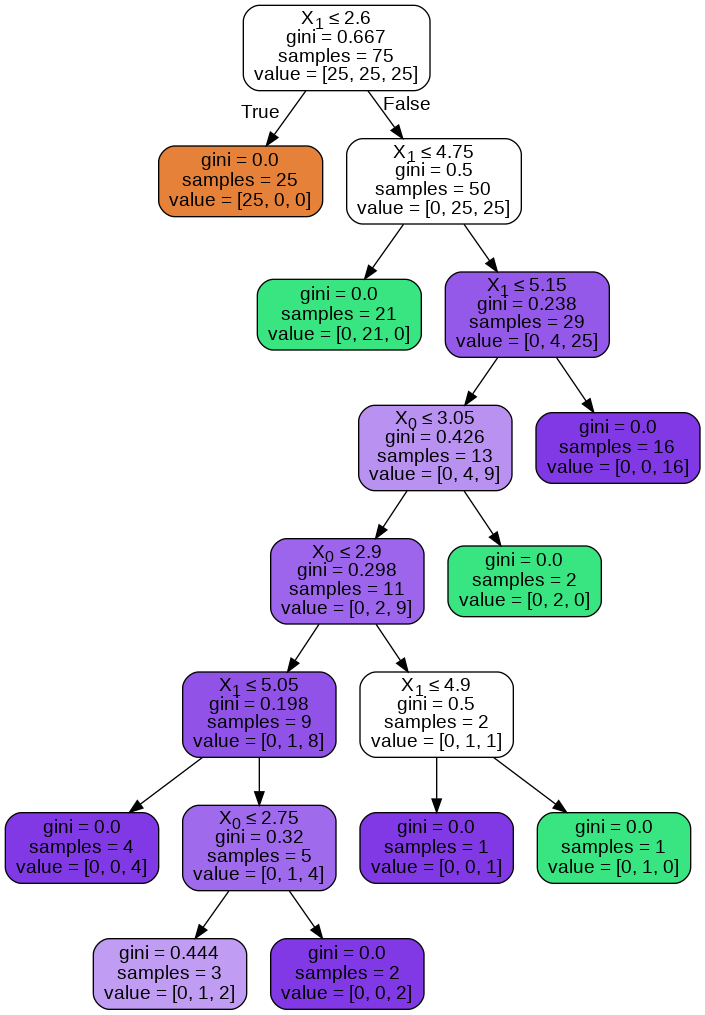

In [ ]:
# Drzewo z współczynnikiem Giniego
tree_gini = tree.DecisionTreeClassifier(criterion='gini') # Uzupełnić parametry konstruktora
tree_gini = tree_gini.fit(X_train, y_train)
tree.plot_tree(tree_gini)
plt.show()

plot_decision_regions(X=X_test, y=y_test, classifier=tree_gini)
plt.title('Tree : Gini')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

# zapis graficzny drzewa i otwarcie go
dot_data = StringIO()
export_graphviz(tree_gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_g.png')
Image(graph.create_png())

# Indeks Giniego mierzy poziom koncentracji rozkładu zmiennej losowej
# Za pomocą tego też indeksu, następuje klasyfikacja

3. Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty.

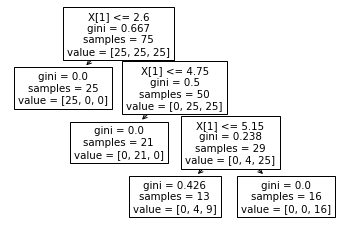

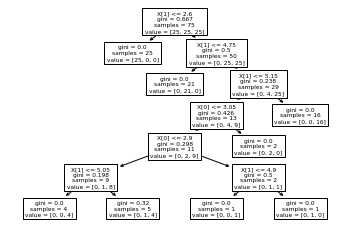

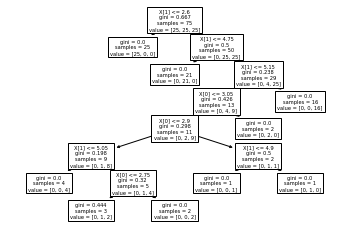

In [ ]:
# Drzewo z współczynnikiem Giniego (depth=3)
tree_gini.max_depth = 3
tree_gini = tree_gini.fit(X_train, y_train)
plt.title('Tree : Gini - depth=3')
tree.plot_tree(tree_gini)
plt.show()

# Drzewo z współczynnikiem Giniego (depth=6)
tree_gini.max_depth = 6
tree_gini = tree_gini.fit(X_train, y_train)
plt.title('Tree : Gini - depth=6')
tree.plot_tree(tree_gini)
plt.show()

# Drzewo z współczynnikiem Giniego (depth=9)
tree_gini.max_depth = 9
tree_gini = tree_gini.fit(X_train, y_train)
plt.title('Tree : Gini - depth=9')
tree.plot_tree(tree_gini)
plt.show()

# W przypadku duzej ilości klas, lepiej radzi sobie z klasyfikacja.
# Głębokość drzewa sprzyja ilości stworzonych klas, co powoduje, większe zróżnicowanie
# W momencie kiedy klas jest niewystarczająco dużo, to wepchnie obiekty do klas, które już zdążył zrobić

4. Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


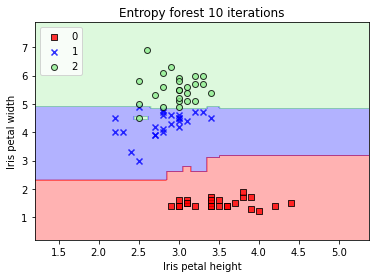

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


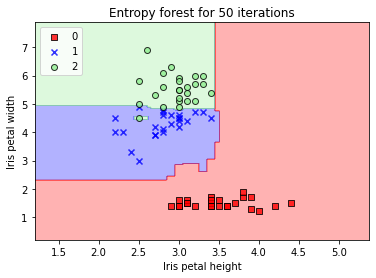

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


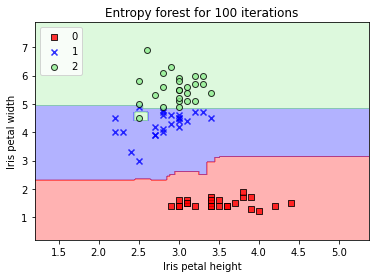

In [ ]:
# Mały las dla entropii - 10 iteracji
forest_entropy_small = RandomForestClassifier(criterion='entropy', n_estimators=10)
forest_entropy_small.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_small, test_idx=range(105, 150))
plt.title('Entropy forest 10 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Duży las dla entropii - 50 iteracji
forest_entropy_big = RandomForestClassifier(criterion='entropy', n_estimators=50)
forest_entropy_big.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_big, test_idx=range(105, 150))
plt.title('Entropy forest for 50 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Wielki las dla entropii - 100 iteracji
forest_entropy_large = RandomForestClassifier(criterion='entropy', n_estimators=100)
forest_entropy_large.fit(X=X_test, y=y_test)
plot_decision_regions(X_test, y_test, classifier=forest_entropy_large, test_idx=range(105, 150))
plt.title('Entropy forest for 100 iterations')
plt.xlabel(r'Iris petal height')
plt.ylabel(r'Iris petal width')
plt.legend(loc='upper left')
plt.show()

# Im więcej iteracji, tym większa dokładność klasyfikacji.
# Widoczne są granice klasy